# Assignment1 Tobigs15th 이성범

## Matrix 구현 
1. Linear Regression 에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해 주세요 
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해 주세요 

### Data Load 

In [ ]:
import pandas as pd 
data = pd.read_csv("assignment1.csv")

In [ ]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [ ]:
data.shape # y:(9,1), X:(9,5)

(9, 6)

In [ ]:
X = data.drop(["y"], axis=1)
y = data.y

In [ ]:
# matrix 계산을 위해 numpy 형태로 바꾸어 줍니다 
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [ ]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5], dtype=int64)

### 1. Normal Equation

## $\hat{\beta} = (X^{T}X)^{-1}X^{T}y $

In [ ]:
import numpy as np
from numpy.linalg import inv 

In [ ]:
def estimate_beta(X, y):
    # np.ones((len(y), 1)) : 관측치 개수(len(y)) 만큼의 1로 채워진 행렬을 만듬 -> x0 즉 절편을 구하기 위한 새로운 변수임
    # np.concatenate([np.ones((len(y), 1)), X] : x0과 X를 합쳐서 새로운 (9,6)의 X 행렬을 만듬
    designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)
    
    # 정규방정식 구현
    # 1. np.dot(designX.T, designX) : 전치한 X 행렬과 X를 곱함
    # 2. inv(np.dot(designX.T, designX)) : 1번 식의 역행렬을 구함
    # 3. np.dot(inv(np.dot(designX.T, designX)), designX.T) : 역행렬과 전치한 X를 곱함
    # 4. np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y) : 3번 식으로 구한 행렬과 y를 곱함
    beta_hat = np.dot(np.dot(inv(np.dot(designX.T, designX)), designX.T), y)
    
    return beta_hat

In [ ]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

In [ ]:
beta_hat.reshape(-1,1)

array([[-3.92447368e+01],
       [ 1.31232583e+00],
       [ 8.53744361e-02],
       [ 7.41849897e-02],
       [ 1.50018573e-02],
       [-3.42273652e-01]])

In [ ]:
print(beta_hat[0]) # intercept
print(beta_hat[1:]) # 추정된 회귀계수 (intercept제외)

-39.24473678136485
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


sklearn의 LinearRegression과 매우 유사한 값이 도출되었음을 알 수 있다.

#### 실제 값과 비교

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [ ]:
print(model.intercept_) # intercept
print(model.coef_) # 추정된 회귀계수 (intercept제외)

-39.24473678135658
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


### 2. MSE

## $MSE = 	\frac{1}{n-(k+1)}\sum (y - \hat{y})^2 $

$ \hat{y} = X\hat{\beta} $

n = 관측치의 수, k = 설명변수 x의 수

In [ ]:
def MSE(X, y, beta_hat):
    # np.ones((len(y), 1)) : 관측치 개수(len(y)) 만큼의 1로 채워진 행렬을 만듬 -> x0
    # np.concatenate([np.ones((len(y), 1)), X] : x0과 X를 합쳐서 새로운 (9,6)의 X 행렬을 만듬
    designX = np.concatenate([np.ones((len(y), 1)), X], axis=1)
    
    # designX와 beta_hat을 곱하여 예측값을 구함
    y_pred = np.dot(designX, beta_hat)
    
    # MSE 구현
    # 1. (y - y_pred) : 실제 값과 예측 값을 빼 잔차를 구한다.
    # 2. (y - y_pred)**2 : 1에서 구한 잔차에 제곱을 구한다.
    # 3. np.sum((y - y_pred)**2) : 2에서 구한 잔차 제곱의 합을 구한다.
    # 4. np.sum((y - y_pred)**2) / (len(y) - (X.shape[1] + 1)) : 3에서 구한 잔차 제곱의 합을 자유도{관측치의 개수(len(y)) - [설명변수의 수(X.shape[1]) + 1]}로 나눈다
    mse = np.sum((y - y_pred)**2) / (len(y) - (X.shape[1] + 1))
    
    return mse

In [ ]:
MSE(X, y, estimate_beta(X, y))

4.846793168705752

모델로 예측한 값과 직접만든 정규방정식을 이용해 예측한 값의 MSE를 비교했을 때 서로 매우 유사한 값이 나왔음을 알 수 있다.

#### 실제 값과 비교

In [ ]:
np.sum((pred - y)**2) / (len(y) - (X.shape[1]+1))

4.846793168705742

### 3.MLE

#### 바구니 안에 파란구슬과 빨간구슬이 들어있을 때, 10개를 추출하여보니 파란구슬이 2개 빨간구슬이 8개가 추출되었습니다. 
#### 이때 바구니안에는 파란구슬과 빨간구슬이 각각 몇개있는지에 대해서 최대우도추정법을 이용해 논리적으로 설명해주세요. 
- 수식은 있어도 좋고 말로 풀어쓰셔도 좋습니다
- 추출은 복원추출을 전제로 합니다
- 글자수 제한은 없습니다. 많이 쓰라는 얘기가 아니라 정말 제한이 없습니다. 너무 부담가지고 쓰지마세요.

 바구니 안에 파란 구슬과 빨간 구슬 만이 들어있다고 가정한다면 우리가 10개의 구슬을 추출하였을 때 파란구슬이 2개 빨간구슬이 8개가 추출되었다면 우리는 직관적으로 바구니 안에 파라구슬이 20%, 빨간구슬이 80%가 들어있다고 직관적으로 추정할 수 있다. 그런데 이런 직관적인 추정을 조금 더 논리적으로 설명할 수 있는 방법이 바로 최대우도추정법이다.

 우선 바구니 안에 구슬의 비율을 생각해보자. 바구니 안의 파란 구슬의 비율을 p라고 정의한다면 빨간 구슬의 비율은 1-p로 정의할 수 있을 것이다. 

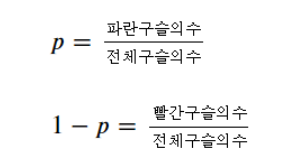

 그리고 이제 우리가 바구니 안에서 구슬을 뽑는 경우의 수를 생각해보자. 우리가 바구니 안에서 구슬을 10번 추출했을때 파란 구슬과 빨간 구슬이 뽑히는 사건을 생각한다면 항상 구슬이 [B, B, B, B, B, B, B, B, R, R] 순으로 뽑히는 것이 아닌 [R, R, B, B, B, B, B, B, B, B] 순 등 여러 순서로 뽑힐 것이다. 이렇게 가능한 모든 사건의 수는 조합을 통해서 나타낼 수 있으며 그 사건의 총합은 $_{10}\mathrm{C}_{2}$ 개 이다. 이러한 모든 사건들을 E라고 칭한다면 10번 추출에서 파란 구슬이 2번, 빨간 구슬이 8번 나올 확률은 밑의 식과 같이 표현할 수 있다.
 

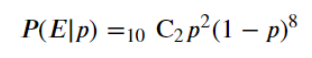

 이렇게 관측된 사건들의 확률 $ P(E|p) $ 를 최대화하는 p를 찾는 것이 최대우도추정법이다. 그런데 우리는 왜? 관측된 사건들의 확률을 최대화하는 최대우도추정법을 통해서 바구니 속의 구슬의 수를 추정할 수 있는 것일까? 최대우도추정법은 발생한 사건이 자주 일어난 사건이다라는 발상에 기초한다. 
 
 따라서 우리가 관측한 사건(파란 구슬이 2개, 빨간 구슬이 8개가 뽑힌 사건)이 많이 보이는 이유는 우리가 관측한 사건이 발생할 확률이 높기 때문이며 이에 관측한 사건의 확률을 가장 크게 하는 p를 찾는다면 바구니 안에 있는 파란 구슬과 빨간 구슬의 개수를 추정할 수 있다. 따라서 $ \hat{p} $은 아래와 같은 식으로 나타낼 수 있다.

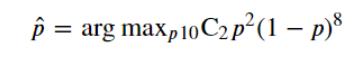

우리는 위의 복잡한 식을 log와 미분을 활용한다면 쉽게 구할 수 있다. 우선 위에 식을 p에 대한 식인 $ f(p)$로 정의하고 log를 취해서 곱하기를 플러스로 바꾸어주고 식에 붙어있던 지수를 앞으로 바깥으로 빼주겠다. log를 취하면 밑과 같은 식으로 나타낼 수 있다.  

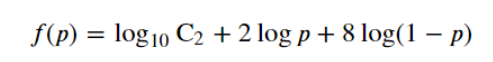

 우리가 찾고자 하는 값은 $f(p)$ 가 최대가 되는 값이다. 최대가 되는 값은 미분을 통해서 구할 수 있다. 미분의 개념을 통해서 알 수 있듯이 도함수가 0이 되는 지점이 곧 기존 함수의 최대가 되는 지점임을 알 수 있다. 따라서 우리는 위에 식을 p에 대하여 미분하면 도함수 $f'(p)$가 0이 되는 값이 곧 $f(p)$가 최대가 된다는 것을 알 수 있다. 위에 식을 p에 대하여 미분하면 다음과 같이 나타낼 수 있다.  

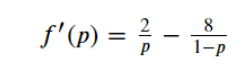

$ \log_{10}\mathrm{C}_{2} $는 상수항이기 때문에 미분을 하면 사라지게 되고 나머지 log 값들은 log의 미분 공식에 의해서 분모로 들어가게 된다. 우리가 구하고자 하는 값은 $f'(p)$가 0이 되는 값이기 때문에 아래와 같이 나타낼 수 있다.

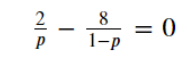

 위 식을 p에 대하여 정리하면 아래와 같은 값이 나옴을 알 수 있다.

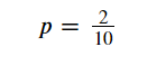

우리가 기존에 파란 구슬의 비율을 p로 정의하였는데 최대우도추정법을 통하여 p가 $ \frac{2}{10} $라는 것을 알 수 있다. 따라서 우리는 최대우도추정법을 통하여 바구니 안에 파란 구슬의 비율을 직관이 아닌 논리적인 추론을 통하여 20%가 존재한다는 것을 입증할 수 있으며 빨간 구슬의 비율도 1 - p 인 $ \frac{8}{10} $ 임도 추정할 수 있다.

#### 참고자료
- 핸즈온 머신러닝 2판 (박해선)
- https://seungtae-jeff.tistory.com/entry/%ED%86%B5%EA%B3%84%ED%95%99-1-%EC%B5%9C%EB%8C%80%EC%9A%B0%EB%8F%84%EC%B6%94%EC%A0%95%EB%B2%95
- https://www.youtube.com/watch?v=sOtkPm_1GYw

그림 같은 경우 가운데 정렬 후 첨부시 오류가 발생하여 따로 이미지 파일로 저장하여 만들었습니다.